# Application Programming Interfaces (APIs)

[Download relevant files here](https://melaniewalsh.org/APIs.zip)

In the previous lessons, we collected internet data by **"scraping"** the surface of Genius.com web pages. We extracted song titles and lyrics based on HTML tags — in other words, based on how the Genius web pages appeared when we, as users, navigated to those pages. But there's another major way of collecting internet data called **Application Programming Interfaces (APIs)**. In this lesson, we're going to use the Genius API and LyricsGenius— a Python package that a data scientist named John Miller created to work with the Genius API—to scrape all the song lyrics for any album on Genius.com.

# Introduction

## What is an API?

 APIs allow you to programmatically extract and interact with data under the hood of websites like Genius as well as other social networks, applications, and projects that make their data publicly available, such as Twitter and [The Smithsonian museums](https://www.smithsonianmag.com/smithsonian-institution/smithsonian-releases-28-million-images-public-domain-180974263/?no-cache).

An API is something that a project or company explicitly designs for data-sharing purposes. Why do companies or projects go to all this trouble? One reason is that it helps to promote the use and further development of an applications and its data. For example, Twitter wants other developers to use, integrate, and build upon Twitter tools and data when they're making their *own* applications and websites. The Twitter API is the main conduit by which those develops can do so.

## Pros and Cons
Because APIs are explicitly designed for data-sharing purposes, working with an API is often a cleaner, more reliable, and more streamlined process than web scraping. However, one of the downsides is that the companies and projects that design the APIs get to decide exactly which kinds of data they want to share, and they often choose not to share their most lucrative and desirable data.

# Genius API

We're going to learn about APIs by exploring the API for Genius.com.

<img src="../images/Genius-API.png" width=100%>

# API Keys

To use the Genius API, you need a special API key (specifically a "Client Access Token"), which is kind of like a password. Many APIs require authentication keys to gain access to them. To get your necessary Genius API keys, you need to navigate to the following URL: https://genius.com/api-clients.

You'll be prompted to sign up for [a Genius account](https://genius.com/signup_or_login), which is required to gain API access. Signing up for a Genius account is free and easy. You just need a Genius nickname (which must be one word), an email address, and a password.

<img src="../images/Genius-login.png" width=100%>

Once you're signed in, you should be taken to https://genius.com/api-clients, where you need to click the button that says "New API Client."

<img src="../images/Genius-New-API.png" width=100%>

After clicking "New API Client," you'll be prompted to fill out a short form about the "App" that you need the Genius API for. You only need to fill out "App Name" and "App Website URL."

<img src="../images/New-API-Client.png" width=100%>

It doesn't really matter what you type in. You can simply put "Song Lyrics Project" for the "App Name" and the URL for our course website "https://melaniewalsh.github.io/Intro-Cultural-Analytics/" for the "App Website URL."

When you click "Save," you'll be given a series of API Keys: a "Client ID" and a "Client Secret." To generate your "Client Access Token," which is the API key that we'll be using in this notebook, you need to click "Generate Access Token".

<img src="../images/Access-Token.png" width=100%>

Finally, copy and paste your "Client Access Token" into the quotation marks below, and run the cell to save your variable 

In [11]:
client_access_token = "INSERT YOUR CLIENT ACCESS TOKEN"

### Protecting Your API Key

For this lesson, if you just copy and paste your Genius API key into your Jupyter notebook, everything should be fine. But that's actually not the best way of storing your API keys. If you published this notebook to GitHub, for example, other people might be able to read and use/steal your API key.

For this reason, it's best practice to keep your API keys away from your code, such as in another file. For example, I made a new Python file called "api_key.py" that contains just one variable `your_client_access_token = "MY API KEY"`, and I can import this variable into my notebook with `import api_key`. 

In [1]:
import api_key

By importing this Python file/module, I get access to the variable `your_client_access_token` without ever explicitly typing my secret API token in this notebook. If I wanted to publish this notebook to GitHub, then I could ignore or leave out the "api_key.py" file that actually contains my Client Access Token.

In [2]:
api_key.your_client_access_token

'INSERT YOUR API KEY HERE'

In [3]:
client_access_token = api_key.your_client_access_token

# Making an API Request

Making an API request looks a lot like typing a specially-formatted URL. That's kind of what it is. But instead of getting a rendered HTML web page in return, you get some data in return.

There are a few different ways that we can query the Genius API, all of which are discussed in the [Genius API documentation](https://docs.genius.com/#songs-h2). The way we're going to cover in this lesson is [the basic search](https://docs.genius.com/#search-h2), which allows you to get a bunch of Genius data about any artist or songs that you search for, and it looks something like this:

`http://api.genius.com/search?q={search_term}&access_token={client_access_token}`

Sticking with our Missy Elliott theme/obsession, we're going to search for Genius data about Missy Elliott.

First we're going to assign the string "Missy Elliott" to the variable `search_term`. Then we're going to make an f-string URL that contains the variables `search_term` and `client_access_token`.

In [12]:
search_term = "Missy Elliott"

In [13]:
genius_search_url = f"http://api.genius.com/search?q={search_term}&access_token={client_access_token}"

This URL is basically all we need to make a Genius API request. Want proof? Run the cell below and print this URL, then copy and paste it into a new tab in your web browser.

In [14]:
print(genius_search_url)

http://api.genius.com/search?q=Missy Elliott&access_token=INSERT YOUR CLIENT ACCESS TOKEN


It doesn't look pretty, but that's a bunch of Genius data about Missy Elliott!

We can programmatically do the same thing by again using the Python library `requests` with this URL. Instead of getting the `.text` of the response, as we did before, we're going to use `.json()`.

[JSON](https://www.w3schools.com/whatis/whatis_json.asp) is a data format that is commonly used by APIs. It's kind of like a more complex CSV file. JSON data can be nested and contains key/value pairs (much like a Python dictionary).

In [86]:
import requests

In [87]:
response = requests.get(genius_search_url)
json_data = response.json()

The JSON data that we get from our Missy Elliott API query looks something like this:

In [88]:
json_data

{'meta': {'status': 200},
 'response': {'hits': [{'highlights': [],
    'index': 'song',
    'type': 'song',
    'result': {'annotation_count': 32,
     'api_path': '/songs/4176',
     'full_title': 'Work It by\xa0Missy\xa0Elliott',
     'header_image_thumbnail_url': 'https://images.genius.com/27c1fbfef17041b435302af288cfa0c6.300x311x1.jpg',
     'header_image_url': 'https://images.genius.com/27c1fbfef17041b435302af288cfa0c6.482x500x1.jpg',
     'id': 4176,
     'lyrics_owner_id': 6654,
     'lyrics_state': 'complete',
     'path': '/Missy-elliott-work-it-lyrics',
     'pyongs_count': 37,
     'song_art_image_thumbnail_url': 'https://images.genius.com/27c1fbfef17041b435302af288cfa0c6.300x311x1.jpg',
     'song_art_image_url': 'https://images.genius.com/27c1fbfef17041b435302af288cfa0c6.482x500x1.jpg',
     'stats': {'unreviewed_annotations': 3,
      'hot': False,
      'pageviews': 1024248},
     'title': 'Work It',
     'title_with_featured': 'Work It',
     'url': 'https://genius.com

We can index this data (again, like a Python dictionary) and look at the first "hit" about Missy Elliott from Genius.com.

In [89]:
json_data['response']['hits'][0]

{'highlights': [],
 'index': 'song',
 'type': 'song',
 'result': {'annotation_count': 32,
  'api_path': '/songs/4176',
  'full_title': 'Work It by\xa0Missy\xa0Elliott',
  'header_image_thumbnail_url': 'https://images.genius.com/27c1fbfef17041b435302af288cfa0c6.300x311x1.jpg',
  'header_image_url': 'https://images.genius.com/27c1fbfef17041b435302af288cfa0c6.482x500x1.jpg',
  'id': 4176,
  'lyrics_owner_id': 6654,
  'lyrics_state': 'complete',
  'path': '/Missy-elliott-work-it-lyrics',
  'pyongs_count': 37,
  'song_art_image_thumbnail_url': 'https://images.genius.com/27c1fbfef17041b435302af288cfa0c6.300x311x1.jpg',
  'song_art_image_url': 'https://images.genius.com/27c1fbfef17041b435302af288cfa0c6.482x500x1.jpg',
  'stats': {'unreviewed_annotations': 3, 'hot': False, 'pageviews': 1024248},
  'title': 'Work It',
  'title_with_featured': 'Work It',
  'url': 'https://genius.com/Missy-elliott-work-it-lyrics',
  'primary_artist': {'api_path': '/artists/1529',
   'header_image_url': 'https://i

We can tell that this data describes the song "Work It" and contains other information about the song, such as its number of Genius annotations, its number of web page views, and links to images of its album cover.

# Looping Through JSON Data

## Get Song Titles

In [26]:
for song in json_data['response']['hits']:
    print(song['result']['full_title'])

Work It by Missy Elliott
WTF (Where They From) by Missy Elliott (Ft. Pharrell Williams)
Get Ur Freak On by Missy Elliott
I'm Better by Missy Elliott (Ft. Cainon Lamb)
Gossip Folks by Missy Elliott (Ft. Ludacris)
The Rain (Supa Dupa Fly) by Missy Elliott
Lose Control by Missy Elliott (Ft. Ciara & Fatman Scoop)
One Minute Man by Missy Elliott (Ft. Ludacris & Trina)
Pass That Dutch by Missy Elliott
This Is Me (The Reimagined Remix) by Keala Settle, Kesha & Missy Elliott


## Get Song Tiles and Page View Counts

In [90]:
for song in json_data['response']['hits']:
    print(song['result']['full_title'], song['result']['stats']['pageviews'])

Work It by Missy Elliott 1024248
WTF (Where They From) by Missy Elliott (Ft. Pharrell Williams) 283487
Get Ur Freak On by Missy Elliott 132107
I'm Better by Missy Elliott (Ft. Cainon Lamb) 101909
Gossip Folks by Missy Elliott (Ft. Ludacris) 92612
The Rain (Supa Dupa Fly) by Missy Elliott 84668
Lose Control by Missy Elliott (Ft. Ciara & Fatman Scoop) 74395
One Minute Man by Missy Elliott (Ft. Ludacris & Trina) 56338
Pass That Dutch by Missy Elliott 40077
This Is Me (The Reimagined Remix) by Keala Settle, Kesha & Missy Elliott 41435


## Transform Song Titles and Page View Counts into a DataFrame

We can loop through this data, append it into a list, and then transform that list into a Pandas dataframe by calling `pd.DataFrame()`

In [91]:
import pandas as pd

In [92]:
missy_songs = []
for song in json_data['response']['hits']:
    missy_songs.append([song['result']['full_title'], song['result']['stats']['pageviews']])
    
#Make a Pandas dataframe from a list
missy_df = pd.DataFrame(missy_songs)
missy_df.columns = ['song_title', 'page_views']
missy_df

,song_title,page_views
0,Work It by Missy Elliott,1024248
1,WTF (Where They From) by Missy Elliott (Ft. Ph...,283487
2,Get Ur Freak On by Missy Elliott,132107
3,I'm Better by Missy Elliott (Ft. Cainon Lamb),101909
4,Gossip Folks by Missy Elliott (Ft. Ludacris),92612
5,The Rain (Supa Dupa Fly) by Missy Elliott,84668
6,Lose Control by Missy Elliott (Ft. Ciara & Fat...,74395
7,One Minute Man by Missy Elliott (Ft. Ludacris ...,56338
8,Pass That Dutch by Missy Elliott,40077
9,This Is Me (The Reimagined Remix) by Keala Set...,41435


## Transform Song Titles, Page View Counts, & Album Covers into a DataFrame

Just for fun, we can do the same thing but also add links to images of Missy Elliott's album art—and we can actually display those images, too!

To display images in a Pandas dataframe, you need to run `from IPython.core.display import HTML` and make the function `get_image_html()`. We're going to take the image URLs and make them into HTML objects.

In [93]:
from IPython.core.display import HTML

In [94]:
def get_image_html(link):
    image_html = f"<img src='{link}' width='100'>"
    return image_html

In [95]:
missy_songs = []
for song in json_data['response']['hits']:
    missy_songs.append([song['result']['full_title'], song['result']['stats']['pageviews'], song['result']['song_art_image_url']])
    
missy_df = pd.DataFrame(missy_songs)
missy_df.columns = ['song_title', 'page_views','album_cover_url']

#Use the function get_image_html()
missy_df['album_cover'] = missy_df['album_cover_url'].apply(get_image_html)
missy_df

,song_title,page_views,album_cover_url,album_cover
0,Work It by Missy Elliott,1024248,https://images.genius.com/27c1fbfef17041b43530...,<img src='https://images.genius.com/27c1fbfef1...
1,WTF (Where They From) by Missy Elliott (Ft. Ph...,283487,https://images.rapgenius.com/a439d6d6020559ffe...,<img src='https://images.rapgenius.com/a439d6d...
2,Get Ur Freak On by Missy Elliott,132107,https://images.genius.com/338e122c1534b6f6363a...,<img src='https://images.genius.com/338e122c15...
3,I'm Better by Missy Elliott (Ft. Cainon Lamb),101909,https://images.genius.com/609afe10820cce09ce9e...,<img src='https://images.genius.com/609afe1082...
4,Gossip Folks by Missy Elliott (Ft. Ludacris),92612,https://images.genius.com/206153c53d05804677e2...,<img src='https://images.genius.com/206153c53d...
5,The Rain (Supa Dupa Fly) by Missy Elliott,84668,https://images.genius.com/a1543159342cd360256c...,<img src='https://images.genius.com/a154315934...
6,Lose Control by Missy Elliott (Ft. Ciara & Fat...,74395,https://images.genius.com/51639e476eac5cb5bed5...,<img src='https://images.genius.com/51639e476e...
7,One Minute Man by Missy Elliott (Ft. Ludacris ...,56338,https://images.genius.com/faad336511ca96884fc6...,<img src='https://images.genius.com/faad336511...
8,Pass That Dutch by Missy Elliott,40077,https://images.genius.com/8c2a5015c6ba9e5f0c15...,<img src='https://images.genius.com/8c2a5015c6...
9,This Is Me (The Reimagined Remix) by Keala Set...,41435,https://images.genius.com/29f15eb96f814e785598...,<img src='https://images.genius.com/29f15eb96f...


If we call `HTML()` on our dataframe and add the method `.to_html(escape=False)` to the dataframe, then it should display the dataframe with viewable images.

In [96]:
HTML(missy_df.to_html(escape=False))

,song_title,page_views,album_cover_url,album_cover
0,Work It by Missy Elliott,1024248,https://images.genius.com/27c1fbfef17041b435302af288cfa0c6.482x500x1.jpg,
1,WTF (Where They From) by Missy Elliott (Ft. Pharrell Williams),283487,https://images.rapgenius.com/a439d6d6020559ffe7c10f0d73722de1.1000x1000x1.jpg,
2,Get Ur Freak On by Missy Elliott,132107,https://images.genius.com/338e122c1534b6f6363afb06f77912cf.300x259x1.jpg,
3,I'm Better by Missy Elliott (Ft. Cainon Lamb),101909,https://images.genius.com/609afe10820cce09ce9e3c768518c63c.600x600x1.jpg,
4,Gossip Folks by Missy Elliott (Ft. Ludacris),92612,https://images.genius.com/206153c53d05804677e236aa2ae4eb45.600x600x1.jpg,
5,The Rain (Supa Dupa Fly) by Missy Elliott,84668,https://images.genius.com/a1543159342cd360256c12b42185771f.975x1000x1.jpg,
6,Lose Control by Missy Elliott (Ft. Ciara & Fatman Scoop),74395,https://images.genius.com/51639e476eac5cb5bed5794c023763ff.700x707x1.jpg,
7,One Minute Man by Missy Elliott (Ft. Ludacris & Trina),56338,https://images.genius.com/faad336511ca96884fc642f4beeba1a6.1000x1000x1.jpg,
8,Pass That Dutch by Missy Elliott,40077,https://images.genius.com/8c2a5015c6ba9e5f0c154f9a20f14534.583x583x1.jpg,
9,"This Is Me (The Reimagined Remix) by Keala Settle, Kesha & Missy Elliott",41435,https://images.genius.com/29f15eb96f814e785598d0eea14126a7.1000x1000x1.png,


# Your Turn! 

Replace "Jorja Smith" with any artist/musician of your choosing and run the following cells.

In [78]:
search_term = "Jorja Smith"

In [79]:
genius_search_url = f"http://api.genius.com/search?q={search_term}&access_token={client_access_token}"

In [80]:
response = requests.get(genius_search_url)
json_data = response.json()

In [81]:
songs = []
for song in json_data['response']['hits']:
    songs.append((song['result']['full_title'], song['result']['stats']['pageviews'], song['result']['song_art_image_url']))
    
artist_df = pd.DataFrame(songs)
artist_df.columns = ['song_title', 'page_views', 'album_cover_url']

artist_df['album_cover'] = artist_df['album_cover_url'].apply(get_image_html)
HTML(artist_df.to_html(escape=False))

,song_title,page_views,album_cover_url,album_cover
0,Blue Lights by Jorja Smith,379836,https://images.genius.com/d24dd57aa0c3b16c85b150bd864187e1.640x640x1.png,
1,Let Me Down by Jorja Smith (Ft. Stormzy),261733,https://images.genius.com/e51b0c6741407f8a0c4f632fa27d793d.1000x1000x1.jpg,
2,On My Mind by Jorja Smith,253129,https://images.genius.com/4bb874749f5715fa1dedd5f7f3d0a78f.1000x1000x1.jpg,
3,Be Honest by Jorja Smith (Ft. Burna Boy),232407,https://images.genius.com/6b076afe88c85bf754ec47633b2dd151.1000x1000x1.jpg,
4,I Am by Jorja Smith,225828,https://images.genius.com/b0ef6cfffeb8c493ca2344f8358e741a.960x960x1.jpg,
5,Don't Watch Me Cry by Jorja Smith,289517,https://images.genius.com/467c61d48cff59c00694b1b3a2e1559a.850x850x1.jpg,
6,Teenage Fantasy by Jorja Smith,199909,https://images.genius.com/1256192fe18ba60a476cc285d7459bf8.1000x1000x1.jpg,
7,February 3rd by Jorja Smith,125650,https://images.genius.com/467c61d48cff59c00694b1b3a2e1559a.850x850x1.jpg,
8,Lost & Found by Jorja Smith,110786,https://images.genius.com/467c61d48cff59c00694b1b3a2e1559a.850x850x1.jpg,
9,Where Did I Go? by Jorja Smith,122509,https://images.genius.com/9fcd6b01c367ab1d8604cbbdb53e0a87.500x500x1.jpg,


# When Other People Build Tools for APIs

It's relatively common for software developers and others to create special Python packages that help people work with a particular API—even if they don't work for the company or project that designed the API. Lucky for us, this is the case with the Genius API.

A data scientist named John Miller wrote a Python package called [LyricsGenius,](https://github.com/johnwmillr/LyricsGenius) which you can see on GitHub below. 

<a href="https://github.com/johnwmillr/LyricsGenius"><img src="../images/LyricsGenius-Git1.png" width=100%></a>

LyricsGenius makes working with the Genius API easier, but it also adds some functionality that is not offered by the Genius API. Remember when I said that companies typically don't offer access to their most lucrative data? Well, the Genius API doesn't offer you a way to get access to song lyrics. That's the bread and butter of the whole website!

To solve this pesky problem, LyricsGenius combines the Genius API with the web scraping library BeautifulSoup (which we are now familiar with!) in order to get and save song lyrics.

<img src="../images/LyricsGenius-Git2.png" width=100%>

## Install the Package

To install LyricsGenius, run:

In [ ]:
!pip install lyricsgenius

To import and set up LyricsGenius, run:

In [98]:
import lyricsgenius
LyricsGenius = lyricsgenius.Genius(client_access_token)

## Get Songs and Lyrics By a Specific Artist

To get the top songs and song lyrics from a specific artist you can use the method `.search_artist()`:

In [99]:
artist = LyricsGenius.search_artist("Missy Elliott", max_songs=6)

Searching for songs by Missy Elliott...

Song 1: "Work It"
Song 2: "WTF (Where They From)"
Song 3: "Get Ur Freak On"
Song 4: "I’m Better"
Song 5: "Gossip Folks"
Song 6: "The Rain (Supa Dupa Fly)"

Reached user-specified song limit (6).
Done. Found 6 songs.


To access the song titles, you can run `artist.songs`:

In [361]:
artist.songs

[('Work It', 'Missy Elliott'),
 ('WTF (Where They From)', 'Missy Elliott'),
 ('Get Ur Freak On', 'Missy Elliott'),
 ('I’m Better', 'Missy Elliott'),
 ('Gossip Folks', 'Missy Elliott'),
 ('The Rain (Supa Dupa Fly)', 'Missy Elliott'),
 ('Lose Control', 'Missy Elliott'),
 ('One Minute Man', 'Missy Elliott'),
 ('Pass That Dutch', 'Missy Elliott'),
 ('Hot Boyz (Remix)', 'Missy Elliott')]

Inside each of those songs, LyricsGenius has already saved the song lyrics. You can access these lyrics by looping through `artist.songs` and pulling out `song.lyrics`:

In [100]:
for song in artist.songs:
    print(song.lyrics)

[Intro]
DJ, please pick up your phone, I'm on the request line
This is a Missy Elliott one-time exclusive, come on

[Chorus]
Is it worth it? Let me work it
I put my thing down, flip it and reverse it
Ti esrever dna ti pilf, nwod gniht ym tup
Ti esrever dna ti pilf, nwod gniht ym tup
If you got a big *elephant trumpet*, let me search ya
And find out how hard I gotta work ya
Ti esrever dna ti pilf, nwod gniht ym tup
Ti esrever dna ti pilf, nwod gniht ym tup
C'mon

[Verse 1]
I'd like to get to know ya so I could show ya
Put the pussy on ya like I told ya
Give me all your numbers so I can phone ya
Your girl acting stank, then call me over
Not on the bed, lay me on your sofa
Call before you come, I need to shave my chocha
You do or you don't or you will or won't ya?
Go downtown and eat it like a vulture
See my hips and my tips, don't ya?
See my ass and my lips, don't ya?
Lost a few pounds and my waist for ya
This the kinda beat that go ra-ta-ta
Ra-ta-ta-ta-ta-ta-ta-ta-ta-ta
Sex me so good I

## Get Specific Song and Lyrics By a Specific Artist

To get the song lyrics from a specific artist, you can use the method `.search_song()`

In [101]:
song = LyricsGenius.search_song("Missy Elliott", "Work It")

Searching for "Missy Elliott" by Work It...
Done.


In [102]:
song.lyrics

"[Intro]\nDJ, please pick up your phone, I'm on the request line\nThis is a Missy Elliott one-time exclusive, come on\n\n[Chorus]\nIs it worth it? Let me work it\nI put my thing down, flip it and reverse it\nTi esrever dna ti pilf, nwod gniht ym tup\nTi esrever dna ti pilf, nwod gniht ym tup\nIf you got a big *elephant trumpet*, let me search ya\nAnd find out how hard I gotta work ya\nTi esrever dna ti pilf, nwod gniht ym tup\nTi esrever dna ti pilf, nwod gniht ym tup\nC'mon\n\n[Verse 1]\nI'd like to get to know ya so I could show ya\nPut the pussy on ya like I told ya\nGive me all your numbers so I can phone ya\nYour girl acting stank, then call me over\nNot on the bed, lay me on your sofa\nCall before you come, I need to shave my chocha\nYou do or you don't or you will or won't ya?\nGo downtown and eat it like a vulture\nSee my hips and my tips, don't ya?\nSee my ass and my lips, don't ya?\nLost a few pounds and my waist for ya\nThis the kinda beat that go ra-ta-ta\nRa-ta-ta-ta-ta-ta

### Save Lyrics to .txt File

In [103]:
song.save_lyrics(extension='txt')

Wrote Work It to lyrics_missyelliott_workit.txt.


## Get Songs and Lyrics For a Specific Album

As you can see, LyricsGenius is an extremely useful Python package! But one thing that we can't do with LyricsGenius is get all the song lyrics for a particular album.

So we're going to use the web scraping functions that we wrote in the last lesson to get all the song titles for a specific album, then use LyricsGenius to get the lyrics for each of those songs, and then save them all as text files in a directory.

In [9]:
from bs4 import BeautifulSoup
import re
import lyricsgenius
import requests

In [4]:
from pathlib import Path

In [ ]:
#import os

### Make RegEx Function To Clean Up Songs

In [5]:
def clean_up(song_title):

    if "Ft" in song_title:
        before_ft_pattern = re.compile(".*(?=\(Ft)")
        song_title_before_ft = before_ft_pattern.search(song_title).group(0)
        clean_song_title = song_title_before_ft.strip()
        clean_song_title = clean_song_title.replace("/", "-")
    
    else:
        song_title_no_lyrics = song_title.replace("Lyrics", "")
        clean_song_title = song_title_no_lyrics.strip()
        clean_song_title = clean_song_title.replace("/", "-")
    
    return clean_song_title

### Make Function To Scrape Song Titles For Album

In [6]:
def get_all_songs_from_album(artist, album_name):
    
    artist = artist.replace(" ", "-")
    album_name = album_name.replace(" ", "-")
    
    response = requests.get(f"https://genius.com/albums/{artist}/{album_name}")
    html_string = response.text
    document = BeautifulSoup(html_string, "html.parser")
    song_title_tags = document.find_all("h3", attrs={"class": "chart_row-content-title"})
    song_titles = [song_title.text for song_title in song_title_tags]
    
    clean_songs = []
    for song_title in song_titles:
        clean_song = clean_up(song_title)
        clean_songs.append(clean_song)
        
    return clean_songs

### Make Function To Download Lyrics For All Songs in Album

In [ ]:
client_access_token = "YOUR CLIENT ACCESS TOKEN"

In [7]:
def download_album_lyrics(artist, album_name): 
    
    # Set up LyricsGenius with your Genius API client access token
    #client_access_token = Your-Client-Access-Token
    LyricsGenius = lyricsgenius.Genius(client_access_token)
    LyricsGenius.remove_section_headers = True
    
    # With the function that we previously created, go to Genius.com and get all song titles for a particular artist's album
    clean_songs = get_all_songs_from_album(artist, album_name)
    
    for song in clean_songs:
        
        #For each song in the list, search for that song with LyricsGenius
        song_object = LyricsGenius.search_song(song, artist)
        
        #If the song is not empty
        if song_object != None:
            
            #Do some cleaning and prep for the filename of the song
            artist_title = artist.replace(" ", "-")
            album_title = album_name.replace(" ", "-")
            song_title = song.replace("/", "-")
            song_title = song.replace(" ", "-")
            
            #Establish the filename for each song inside a directory that begins with the artist's name and album title
            filename=f"{artist_title}-{album_title}/{song_title}"
            
            #A line of code that we need to create a directory
             #os.makedirs(os.path.dirname(filename), exist_ok=True)
            Path(f"{artist_title}-{album_title}").mkdir(parents=True, exist_ok=True)
            
            #Save the lyrics for the song as a text file
            song_object.save_lyrics(filename=filename, extension='txt')
        
        #If the song doesn't contain lyrics
        else:
            print('No lyrics')

In [10]:
download_album_lyrics("Missy Elliott", "Under Construction")

Searching for "Intro-Go To The Floor" by Missy Elliott...
Done.
Wrote Intro/Go To The Floor to Missy-Elliott-Under-Construction/Intro-Go-To-The-Floor.txt.
Searching for "Bring the Pain" by Missy Elliott...
Done.
Wrote Bring the Pain to Missy-Elliott-Under-Construction/Bring-the-Pain.txt.
Searching for "Gossip Folks" by Missy Elliott...
Done.
Wrote Gossip Folks to Missy-Elliott-Under-Construction/Gossip-Folks.txt.
Searching for "Work It" by Missy Elliott...
Done.
Wrote Work It to Missy-Elliott-Under-Construction/Work-It.txt.
Searching for "Back in the Day" by Missy Elliott...
Done.
Wrote Back in the Day to Missy-Elliott-Under-Construction/Back-in-the-Day.txt.
Searching for "Funky Fresh Dressed" by Missy Elliott...
Done.
Wrote Funky Fresh Dressed to Missy-Elliott-Under-Construction/Funky-Fresh-Dressed.txt.
Searching for "Pussycat" by Missy Elliott...
Done.
Wrote Pussycat to Missy-Elliott-Under-Construction/Pussycat.txt.
Searching for "Nothing Out There for Me" by Missy Elliott...
Done.
W

# Some Extra Album Analysis Fun

Since we now have access to all these great song lyrics, we might as well run some basic analysis on them! We can use the word frequency code that we introduced during the first couple weeks to count the most frequent words in an entire album.

In [ ]:
import nltk
nltk.download('stopwords')
from collections import Counter
from nltk.corpus import stopwords

## Make a Function That Splits Up Words

In [65]:
def split_into_words(any_chunk_of_text):
    lowercase_text = any_chunk_of_text.lower()
    split_words = re.split("\W+", lowercase_text)
    return split_words

## Make a Function That Counts Top 15 Words in Text File

In [73]:
def get_most_frequent_words(filepath_of_text):
    
    nltk_stop_words = stopwords.words("english")
    number_of_desired_words = 15
    
    full_text = open(filepath_of_text, encoding="utf-8").read()

    all_the_words = split_into_words(full_text)
    meaningful_words = [word for word in all_the_words if word not in nltk_stop_words]
    meaningful_words_tally = Counter(meaningful_words)
    most_frequent_meaningful_words = meaningful_words_tally.most_common(number_of_desired_words)

    return most_frequent_meaningful_words

## Make a Function That Counts Top 15 Words in An Entire Dicrectory of Text Files

In [74]:
def get_most_frequent_words_directory(directory):
    
    nltk_stop_words = stopwords.words("english")
    number_of_desired_words = 15
    meaningful_words_tally = Counter()
    
    for filepath_of_text in os.listdir(directory):
        if filepath_of_text.endswith(".txt"):
    
            full_text = open(f"{directory}/{filepath_of_text}", encoding="utf-8").read()

            all_the_words = split_into_words(full_text)
            meaningful_words = [word for word in all_the_words if word not in nltk_stop_words]
            meaningful_words_tally.update(meaningful_words)
    
    most_frequent_meaningful_words = meaningful_words_tally.most_common(number_of_desired_words)

    return most_frequent_meaningful_words

In [75]:
get_most_frequent_words_directory("Missy-Elliott-Under-Construction")

[('oh', 119),
 ('like', 96),
 ('go', 72),
 ('ya', 70),
 ('get', 56),
 ('know', 54),
 ('got', 53),
 ('ti', 49),
 ('let', 48),
 ('one', 40),
 ('love', 36),
 ('missy', 35),
 ('yeah', 35),
 ('come', 34),
 ('see', 33)]

## Data Viz With Pandas

In [59]:
import pandas as pd

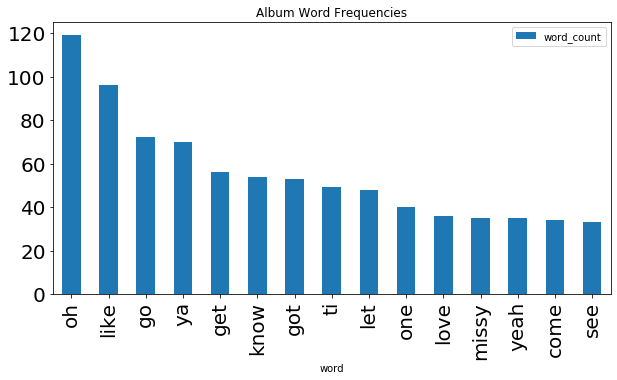

In [76]:
frequencies = get_most_frequent_words_directory("Missy-Elliott-Under-Construction")
word_frequency_df = pd.DataFrame(frequencies)
word_frequency_df.columns = ['word', 'word_count']
word_frequency_df.plot(x='word', kind='bar', figsize=(10,5), title="Album Word Frequencies", fontsize=20)